@author: Octavio Gutiérrez de Código Máquina 

URL del canal: https://www.youtube.com/CodigoMaquina 

URL del video: https://youtu.be/70U0WYL5KHg

<h1 style="color:purple">Métodos de Pronóstico Simples</h1> 
<h2 style="color:violet">Librerías y personalización de gráficas</h2> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Personalización de parámetros para todas las gráficas
plt.rcParams["figure.figsize"] = [16, 5]
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["lines.markerfacecolor"] = "purple"
plt.rcParams["lines.markeredgecolor"] = "purple"
plt.rcParams["lines.markersize"] = 12
plt.rcParams["patch.facecolor"] = "purple"
plt.rcParams["patch.edgecolor"] = "purple"
plt.rcParams["xtick.color"] = "gray"
plt.rcParams["ytick.color"] = "gray"

# Ignorar warnings
warnings.filterwarnings('ignore')

<h2 style="color:purple">Datos, gráfica y configuración del pronóstico</h2> 

In [2]:
# Horizonte del pronóstico: 7 días
horizonte = 7

# Cargando datos de las acciones de Apple de Mayo de 2023 
datos = pd.read_csv("apple.csv")
datos = datos[["fecha", "valor"]].set_index(["fecha"])

# Rango del eje de las x para graficar los pronósticos en función del horizonte
rango_pronostico = np.arange(datos.index.size, datos.index.size + horizonte)

<h1 style="color:Purple">Método Ingenuo</h1> 

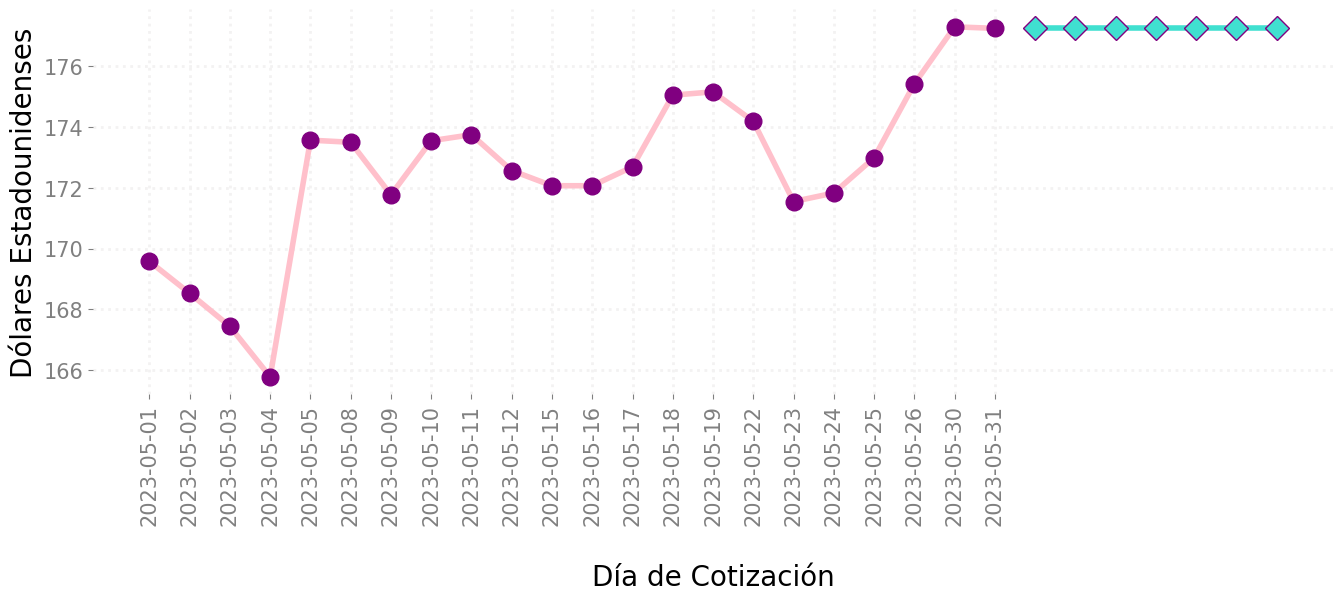

In [3]:
# Gráfica de la serie de tiempo del costo de las acciones
fig, ax = plt.subplots()
ax.plot(datos.index, datos["valor"], color="pink", marker="o")

# Método ingenuo que predice a partir del último valor -> datos["costo"][-1:]
ax.plot(rango_pronostico,
        [datos["valor"][-1:]] * horizonte, 
        label="Método Ingenuo",
        color="turquoise", marker="D", markerfacecolor="turquoise")

# Más personalización de la gráfica
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
ax.set_ylabel("Dólares Estadounidenses")
ax.set_xlabel("\nDía de Cotización")
plt.grid(color="#F3F2F2", linestyle=":", linewidth=2)
plt.show()

<h1 style="color:Purple">Método de la Media</h1> 

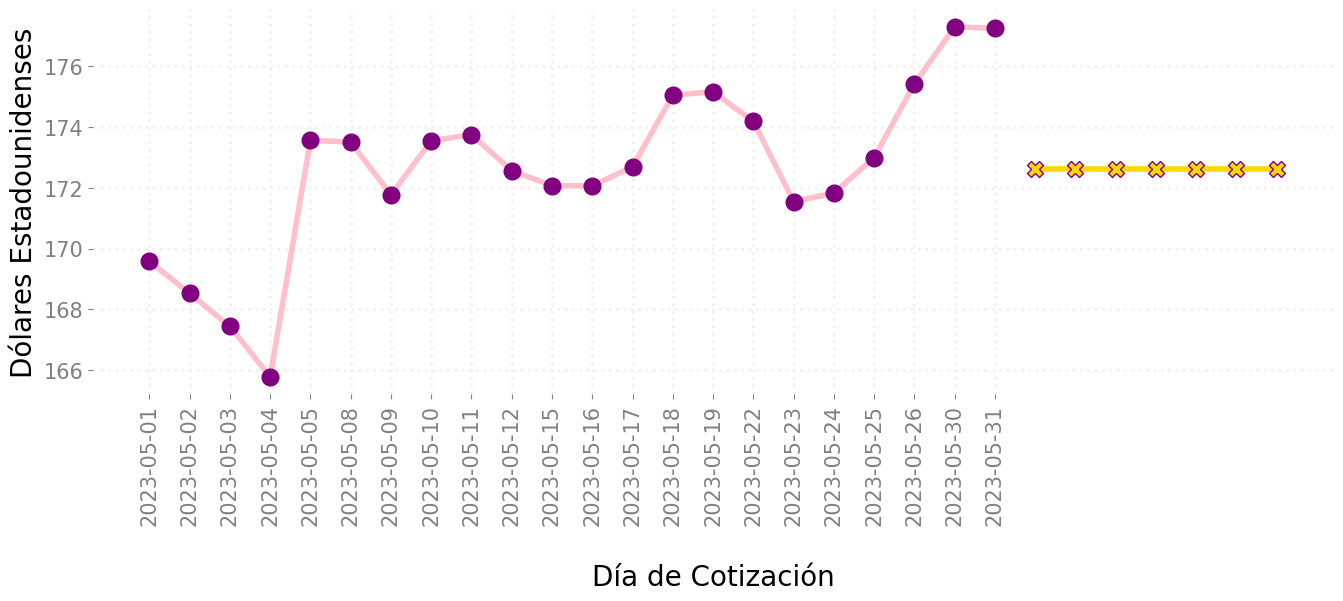

In [4]:
# Gráfica de la serie de tiempo del costo de las acciones
fig, ax = plt.subplots()
ax.plot(datos.index, datos["valor"], color="pink", marker="o")

# Método de la media que predice a partir de la media -> datos["costo"].mean()
ax.plot(rango_pronostico,
        [datos["valor"].mean()] * horizonte, 
        label="Método de la Media",
        color="gold", marker="X", markerfacecolor="gold")

# Más personalización de la gráfica
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
ax.set_ylabel("Dólares Estadounidenses")
ax.set_xlabel("\nDía de Cotización")
plt.grid(color="#F3F2F2", linestyle=":", linewidth=2)
plt.show()

<h1 style="color:Purple">Método de la Media Móvil Simple</h1> 

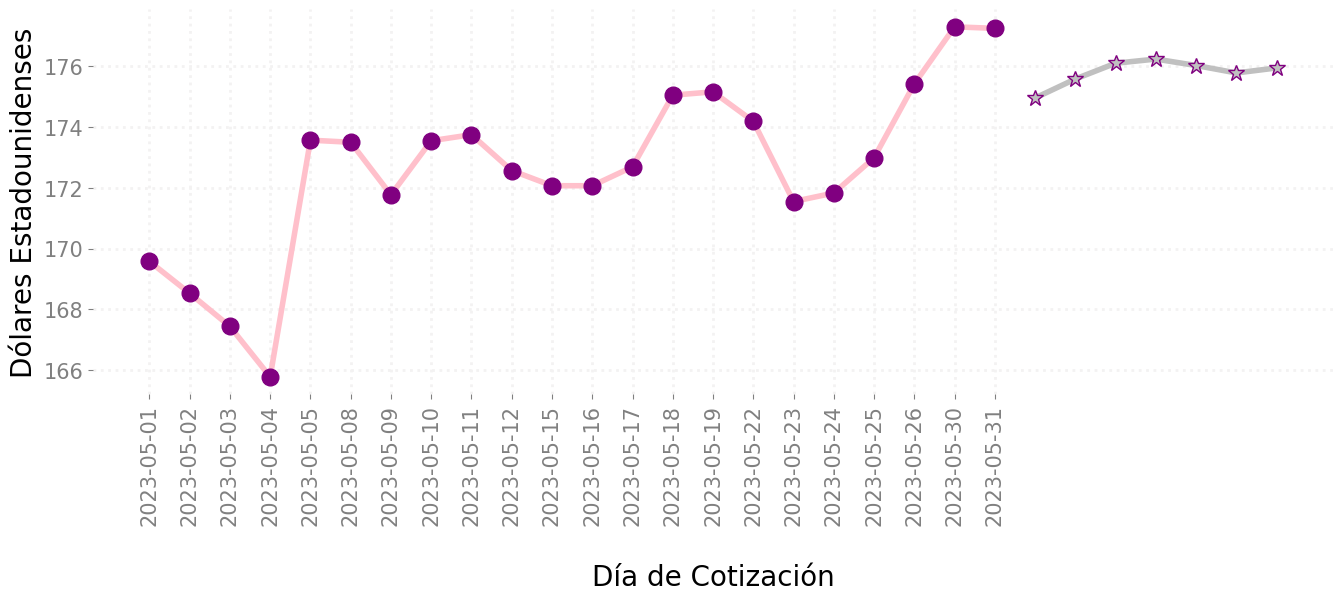

In [5]:
# Gráfica de la serie de tiempo del costo de las acciones
fig, ax = plt.subplots()
ax.plot(datos.index, datos["valor"], color="pink", marker="o")

# Método de la Media Móvil Simple con una ventana de 5 días
ventana = 5

# Días a promediar en función de la ventana
ventana_movil = np.array(datos["valor"][-ventana:].values)
pronosticos = np.array([])
for t in range(horizonte):
    # Mueve la ventana y agrega la nueva media
    ventana_movil = np.append(ventana_movil[1:], ventana_movil.mean())
    # Registro de todos los pronósticos realizados para cada día
    pronosticos = np.append(pronosticos, ventana_movil[-1:])  
        
ax.plot(rango_pronostico,
        pronosticos, label="Método de la Media Móvil Simple",
        color="silver", marker="*", markerfacecolor="silver")

# Más personalización de la gráfica
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
ax.set_ylabel("Dólares Estadounidenses")
ax.set_xlabel("\nDía de Cotización")
plt.grid(color="#F3F2F2", linestyle=":", linewidth=2)
plt.show()

<h1 style="color:Purple">Método de la Deriva</h1>

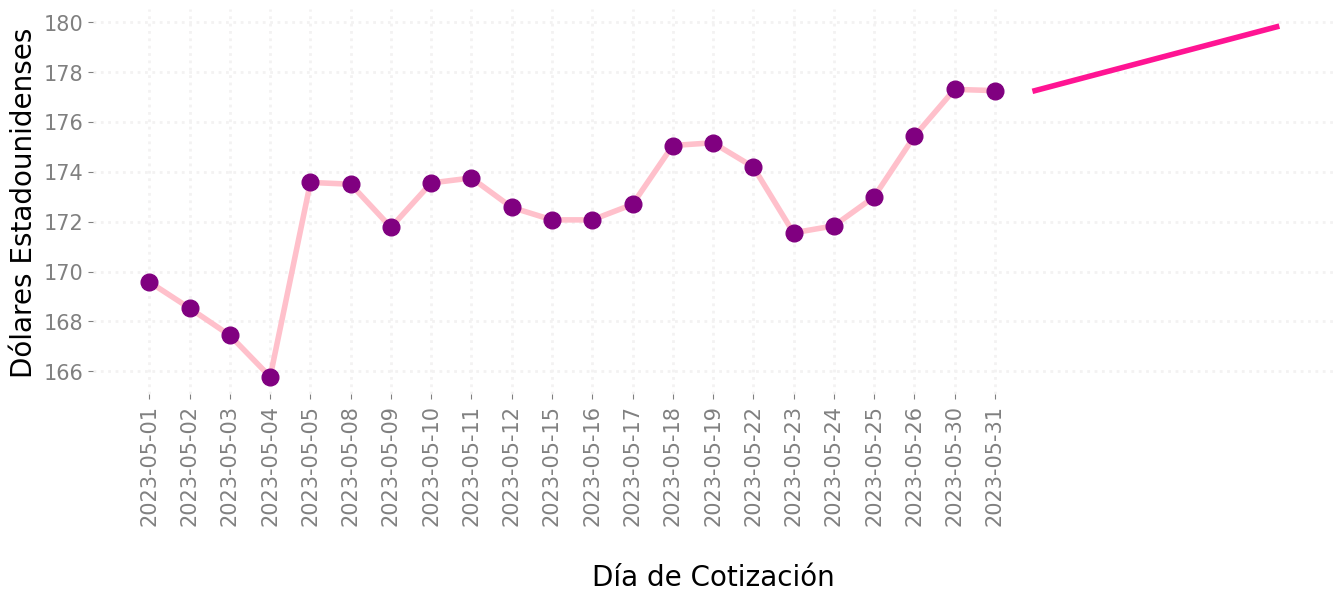

In [6]:
# Gráfica de la serie de tiempo del costo de las acciones
fig, ax = plt.subplots()
ax.plot(datos.index, datos["valor"], color="pink", marker="o")

# Método de la deriva

# Primer valor de la serie de tiempo
primero = datos["valor"][:1][0]

# Último valor de la serie de tiempo
ultimo = datos["valor"][-1:][0]

# Cantidad de observaciones de la serie de tiempo
observaciones = datos["valor"].size

# Cálculo del pronóstico en función de la fórmula del método de la deriva
pronostico = ultimo + horizonte*((ultimo-primero) / (observaciones-1))

ax.plot([datos.index.size, datos.index.size + horizonte - 1], 
        [ultimo, pronostico], 
        label="Método de la Deriva",
        color="deeppink")

# Más personalización de la gráfica
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
ax.set_ylabel("Dólares Estadounidenses")
ax.set_xlabel("\nDía de Cotización")
plt.grid(color="#F3F2F2", linestyle=":", linewidth=2)
plt.show()

<h1 style="color:purple">Método Ingenuo Estacional</h1> 

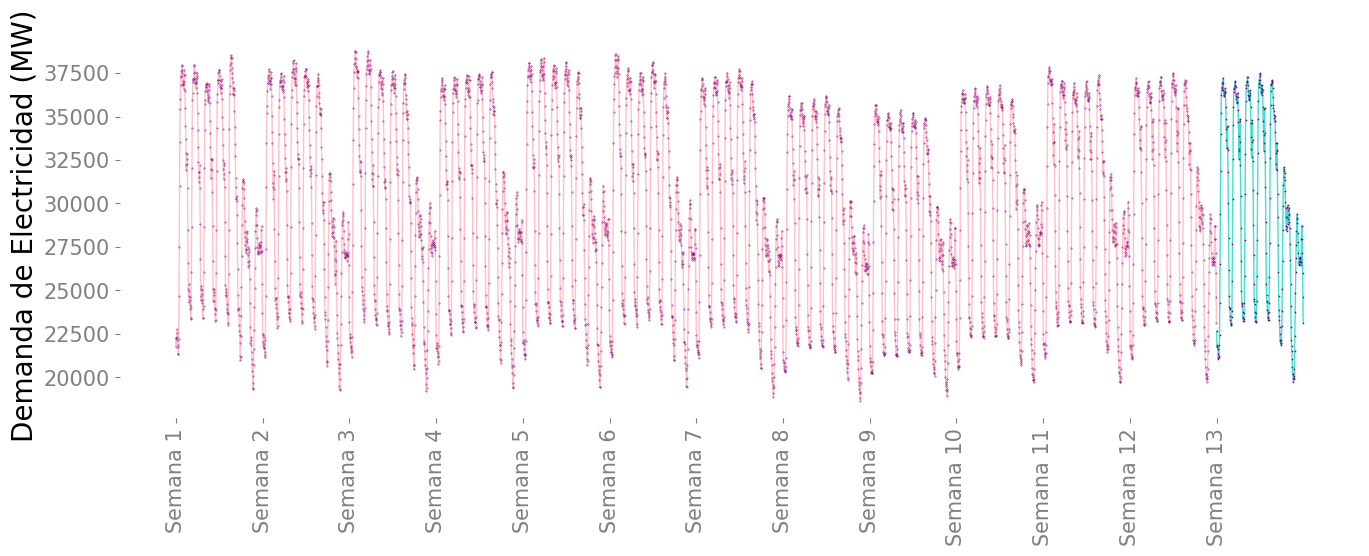

In [7]:
# Cargando datos de la demanda de electricidad
datos = pd.read_csv("electricidad.csv")

# Para estos datos, una semana consta de 336 puntos
semana = 336

# Gráfica de la serie de tiempo de la demanda de electricidad
fig, ax = plt.subplots()
ax.plot(np.arange(datos["valor"].size), datos["valor"],
        color="pink", marker="o", linewidth=1, markersize=0.3,
        markerfacecolor="purple", markeredgecolor="purple")


# Método ingenuo estacional
ax.plot(np.arange(datos["valor"].size, datos["valor"].size+semana), 
        datos["valor"][-semana:], 
        color="turquoise", marker="D", linewidth=1, markersize=0.3,
        markerfacecolor="purple", markeredgecolor="purple")

# Más personalización de la gráfica
ax.set_ylabel("Demanda de Electricidad (MW)")
ax.set_xticklabels(["Semana 1","Semana 2","Semana 3","Semana 4","Semana 5","Semana 6","Semana 7","Semana 8","Semana 9","Semana 10","Semana 11","Semana 12", "Semana 13"])
ax.xaxis.set_ticks(np.arange(0, datos["valor"].size+semana, (datos["valor"].size+semana)/13))
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
plt.show()


<h1 style="color:purple">Todos los pronósticos simples</h1> 

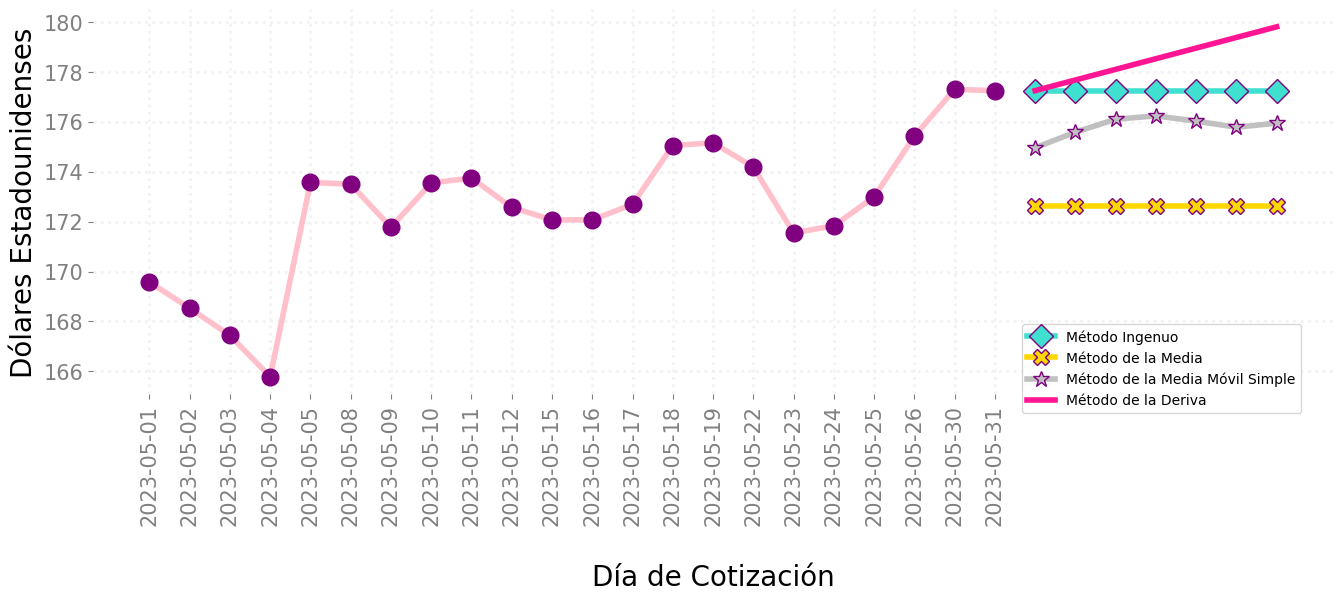

In [8]:
# Horizonte del pronóstico: 7 días
horizonte = 7

# Cargando datos de las acciones de Apple de Mayo de 2023 
datos = pd.read_csv("apple.csv")
datos = datos[["fecha", "valor"]].set_index(["fecha"])

# Gráfica de la serie de tiempo del costo de las acciones
fig, ax = plt.subplots()
ax.plot(datos.index, datos["valor"], color="pink", marker="o")

### Método ingenuo que predice a partir del último valor -> datos["costo"][-1:]
ax.plot(rango_pronostico,
        [datos["valor"][-1:]] * horizonte, 
        label="Método Ingenuo",
        color="turquoise", marker="D", markerfacecolor="turquoise")

### Método de la media que predice a partir de la media -> datos["costo"].mean()
ax.plot(rango_pronostico,
        [datos["valor"].mean()] * horizonte, 
        label="Método de la Media",
        color="gold", marker="X", markerfacecolor="gold")

### Método de la Media Móvil Simple con una ventana de 5 días
ventana = 5
# Días a promediar en función de la ventana
ventana_movil = np.array(datos["valor"][-ventana:].values)
pronosticos = np.array([])
for t in range(horizonte):
    # Mueve la ventana y agrega la nueva media
    ventana_movil = np.append(ventana_movil[1:], ventana_movil.mean())
    # Registro de todos los pronósticos realizados para cada día
    pronosticos = np.append(pronosticos, ventana_movil[-1:])  
        
ax.plot(rango_pronostico,
        pronosticos, label="Método de la Media Móvil Simple",
        color="silver", marker="*", markerfacecolor="silver")

### Método de la deriva

# Primer valor de la serie de tiempo
primero = datos["valor"][:1][0]

# Último valor de la serie de tiempo
ultimo = datos["valor"][-1:][0]

# Cantidad de observaciones de la serie de tiempo
observaciones = datos["valor"].size

# Cálculo del pronóstico en función de la fórmula del método de la deriva
pronostico = ultimo + horizonte*((ultimo-primero) / (observaciones-1))

ax.plot([datos.index.size, datos.index.size + horizonte - 1], 
        [ultimo, pronostico], 
        label="Método de la Deriva",
        color="deeppink")

ax.legend(bbox_to_anchor=(0.98, 0.2))
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
ax.set_ylabel("Dólares Estadounidenses")
ax.set_xlabel("\nDía de Cotización")
plt.grid(color="#F3F2F2", linestyle=":", linewidth=2)

plt.show()